In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
df_agencias = pd.read_csv('agencias.csv')
df_clientes = pd.read_csv('clientes.csv')
df_clbagencia = pd.read_csv('colaborador_agencia.csv')
df_colab = pd.read_csv('colaboradores.csv')
df_contas = pd.read_csv('contas.csv')
df_transacoes = pd.read_csv('transacoes.csv')
df_proposta_credito = pd.read_csv('propostas_credito.csv')

In [34]:
df_TCA = (df_transacoes.merge(df_contas, how = 'left').merge(df_agencias,on='cod_agencia', how='left'))
df_TCA.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura_x,saldo_total,saldo_disponivel,data_ultimo_lancamento,nome,endereco,cidade,uf,data_abertura_y,tipo_agencia
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0,256,7,84,PF,2020-04-28 16:46:00 UTC,3.880,494.70,2022-11-02 17:44:43 UTC,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0,256,7,84,PF,2020-04-28 16:46:00 UTC,3.880,494.70,2022-11-02 17:44:43 UTC,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0,512,9,90,PF,2020-05-12 12:40:00 UTC,5687.066,4791.86,2022-02-06 14:04:31 UTC,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0,512,9,90,PF,2020-05-12 12:40:00 UTC,5687.066,4791.86,2022-02-06 14:04:31 UTC,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0,512,9,90,PF,2020-05-12 12:40:00 UTC,5687.066,4791.86,2022-02-06 14:04:31 UTC,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física


In [36]:
df_TCA.drop(['cod_transacao','num_conta','cod_cliente','cod_agencia','cod_colaborador','data_abertura_x','saldo_total','saldo_disponivel','nome','data_ultimo_lancamento','cidade','data_abertura_y','tipo_agencia'], axis=1)

,data_transacao,nome_transacao,valor_transacao,tipo_conta,endereco,uf
0,2020-05-22 03:15:21 UTC,Saque,-130.0,PF,"Av. Paulista, 1436 - Cerqueira César, São Paul...",SP
1,2021-06-29 11:52:38 UTC,Saque,-255.0,PF,"Av. Paulista, 1436 - Cerqueira César, São Paul...",SP
2,2020-05-17 13:04:50 UTC,Saque,-250.0,PF,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",SC
3,2020-09-06 02:55:34 UTC,Saque,-80.0,PF,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",SC
4,2020-10-16 09:26:52 UTC,Saque,-475.0,PF,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",SC
...,...,...,...,...,...,...
71994,2022-12-29 23:59:59.746608 UTC,Transferência entre CC - Crédito,82.3,PF,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",PE
71995,2022-12-29 23:59:59.055028 UTC,Transferência entre CC - Crédito,414.8,PF,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",PE
71996,2012-05-07 13:45:41 UTC,Transferência entre CC - Crédito,720.4,PF,"Av. Paulista, 1436 - Cerqueira César, São Paul...",SP
71997,2015-09-19 05:13:07 UTC,Transferência entre CC - Crédito,1143.0,PF,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",SP


In [ ]:
df_TCA.columns

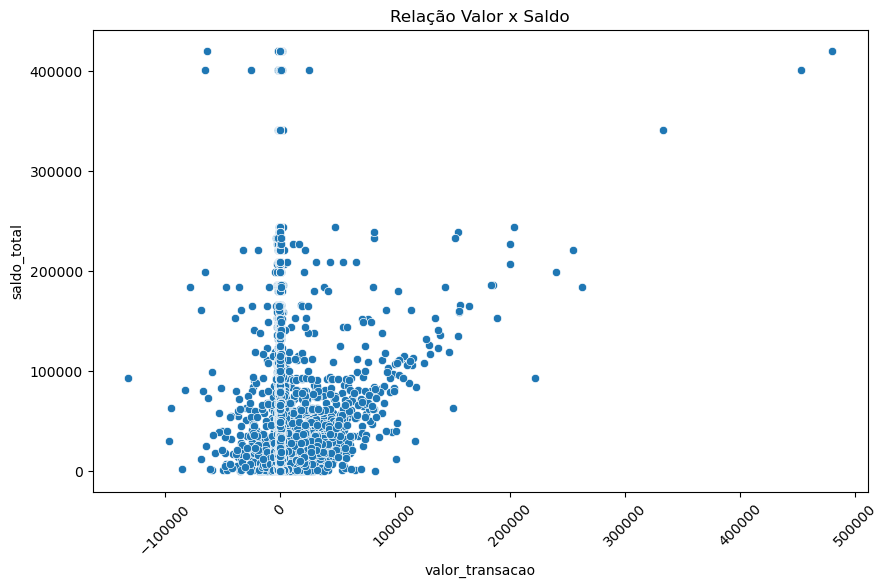

In [38]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(x=df_TCA['valor_transacao'],
                y=df_TCA['saldo_total'],
                )
plt.title('Relação Valor x Saldo')
plt.show()

In [40]:
df_ColabAG = (df_proposta_credito.merge(df_contas,on='cod_colaborador', how = 'left').merge(df_colab,on='cod_colaborador', how='left').merge(df_clbagencia, on='cod_agencia', how='left').merge(df_agencias, on='cod_agencia', how='left'))

df_ColabAG

,cod_proposta,cod_cliente_x,cod_colaborador_x,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,...,data_nascimento,endereco_x,cep,cod_colaborador_y,nome,endereco_y,cidade,uf,data_abertura_y,tipo_agencia
0,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,...,1996-01-31,"Vereda da Rocha, 240 Vila Aeroporto 10668-659 ...",69097997,1.0,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
1,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,...,1996-01-31,"Vereda da Rocha, 240 Vila Aeroporto 10668-659 ...",69097997,11.0,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
2,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,...,1996-01-31,"Vereda da Rocha, 240 Vila Aeroporto 10668-659 ...",69097997,25.0,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
3,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,...,1996-01-31,"Vereda da Rocha, 240 Vila Aeroporto 10668-659 ...",69097997,38.0,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
4,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,...,1996-01-31,"Vereda da Rocha, 240 Vila Aeroporto 10668-659 ...",69097997,39.0,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189747,1562,998,100,2017-03-22 12:25:42 UTC,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,...,1975-03-24,"Colônia Lima, 83 Flamengo 36172-665 da Mota / SE",74890752,82.0,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física
189748,1562,998,100,2017-03-22 12:25:42 UTC,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,...,1975-03-24,"Colônia Lima, 83 Flamengo 36172-665 da Mota / SE",74890752,89.0,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física
189749,1562,998,100,2017-03-22 12:25:42 UTC,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,...,1975-03-24,"Colônia Lima, 83 Flamengo 36172-665 da Mota / SE",74890752,95.0,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física
189750,1562,998,100,2017-03-22 12:25:42 UTC,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,...,1975-03-24,"Colônia Lima, 83 Flamengo 36172-665 da Mota / SE",74890752,99.0,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física


In [42]:
df_ColabAG.drop(['cod_proposta','cod_cliente_x','data_abertura_y','carencia','cod_cliente_y','data_ultimo_lancamento','data_entrada_proposta','status_proposta', 'endereco_x','cod_colaborador_y','cep'], axis=1)

,cod_colaborador_x,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,num_conta,cod_agencia,tipo_conta,...,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,nome,endereco_y,cidade,uf,tipo_agencia
0,1,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,253.0,9.0,PF,...,Lorena,da Mata,luiz-felipefarias@example.org,843.201.579-23,1996-01-31,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,Física
1,1,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,253.0,9.0,PF,...,Lorena,da Mata,luiz-felipefarias@example.org,843.201.579-23,1996-01-31,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,Física
2,1,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,253.0,9.0,PF,...,Lorena,da Mata,luiz-felipefarias@example.org,843.201.579-23,1996-01-31,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,Física
3,1,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,253.0,9.0,PF,...,Lorena,da Mata,luiz-felipefarias@example.org,843.201.579-23,1996-01-31,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,Física
4,1,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,253.0,9.0,PF,...,Lorena,da Mata,luiz-felipefarias@example.org,843.201.579-23,1996-01-31,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,Física
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189747,100,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,355.0,10.0,PF,...,Lavínia,Cunha,noahmoraes@example.com,062.937.158-02,1975-03-24,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,Física
189748,100,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,355.0,10.0,PF,...,Lavínia,Cunha,noahmoraes@example.com,062.937.158-02,1975-03-24,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,Física
189749,100,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,355.0,10.0,PF,...,Lavínia,Cunha,noahmoraes@example.com,062.937.158-02,1975-03-24,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,Física
189750,100,0.0147,114794.473196,165036.26,50241.786804,3505.120046,45,355.0,10.0,PF,...,Lavínia,Cunha,noahmoraes@example.com,062.937.158-02,1975-03-24,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,Física


In [44]:
df_ColabAG_Filtrado = df_ColabAG.groupby(['cod_colaborador_x','cidade'])['cod_colaborador_x'].count().sort_values(ascending=False).reset_index(name='Contagem')
df_ColabAG_Filtrado

,cod_colaborador_x,cidade,Contagem
0,26,São Paulo,12936
1,84,São Paulo,12663
2,85,São Paulo,9744
3,64,São Paulo,8680
4,86,São Paulo,8673
...,...,...,...
89,8,Recife,200
90,44,Rio de Janeiro,176
91,100,Recife,170
92,95,Recife,150


In [55]:
df_cidade_av = df_ColabAG_Filtrado.groupby('cidade')['Contagem'].mean().sort_values(ascending=False).reset_index()
df_cidade_av

,cidade,Contagem
0,São Paulo,3070.953488
1,Osasco,1811.000000
2,Campinas,1801.000000
3,Rio de Janeiro,1086.000000
4,Porto Alegre,1029.000000
5,Florianópolis,541.000000
6,Recife,215.000000


ValueError: Can only compare identically-labeled Series objects

In [ ]:
df_ColabAG_Cidade = df_ColabAG.groupby(['cidade'])['cod_colaborador_x'].count().sort_values(ascending=False).reset_index(name='Contagem')
df_ColabAG_Cidade

In [ ]:
df_top5 = df_ColabAG_Filtrado.sort_values(by='Contagem', ascending=False).head(5)

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(x='cidade', y='Contagem', data=df_ColabAG_Cidade)
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.title('Contagem por Cidade')

plt.show()

In [ ]:
print(df_ColabAG_Filtrado.head())

In [ ]:
sns.barplot(x='cod_colaborador_x', y='Contagem', data=df_ColabAG_Filtrado.head(10), order=df_ColabAG_Filtrado['cod_colaborador_x'].head(10))  
plt.xlabel('cod_colaborador_x')
plt.ylabel('Contagem')
plt.title('Contagem por Funcionário SP')
plt.show()